In [1]:
install.packages("janitor")

Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)



In [2]:
library(reticulate)
library(bigrquery)
library(ggplot2)
library(tidyverse)
library(ggpubr)
library(vcfR)
library(janitor)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


   *****       ***   vcfR   ***       *****
   This is vcfR 1.13.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [3]:
fapi = import('firecloud.api')

In [4]:
BILLING_PROJECT_ID = Sys.getenv('GOOGLE_PROJECT')       # terra-7a376e4e
WORKSPACE_BUCKET = Sys.getenv('WORKSPACE_BUCKET')       # gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34
WORKSPACE_NAME = Sys.getenv('WORKSPACE_NAME')           # AoU_DRC_WGS_LongReads_PacBio
WORKSPACE_NAMESPACE = Sys.getenv('WORKSPACE_NAMESPACE') # allofus-drc-wgs-lr-prod

In [5]:
load_workspace_table <- function(table_name) {
    a = fapi$get_entities(WORKSPACE_NAMESPACE, WORKSPACE_NAME, table_name)

    json = a$json()
    df = tibble(metadata = json) %>% unnest_wider(metadata) %>% unnest_wider(attributes)

    for (name in df %>% select(where(is.list)) %>% names()) {
        q = as.vector(unlist(df[,name])) %in% c("true", "TRUE", "false", "FALSE") %>% unique()
        if (q) {
            df[,name] = as.logical(as.vector(unlist(df[,name])))
        }
    }
    
    return(df)
}

In [6]:
ha_sample_t2t_df = load_workspace_table('ha-sample-t2t')

In [7]:
ha_sample_t2t_df

dvp_tbi,hifiasm_hap2,sniffles_tbi,clair_gvcf,clair_tbi,pbsv_structural_variant_stats,pbsv_vcf,pav_small_variant_stats,clair_small_variant_stats,aligned_read_length_median,⋯,ha-sm-specific-atomic-t2ts,aligned_bam,sniffles_vcf,dvp_g_vcf,pav_vcf,dvp_g_tbi,pav_structural_variant_stats,average_identity,entityType,name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<list>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.deepvariant_pepper.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/PBAssembleWithHifiasm/1000513/assembly/1000513.haploTigs/1000513.bp.hap2.p_ctg.fa.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/sv/1000513.sniffles.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.clair.g.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.clair.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1000513/1000513.pbsv.stats.txt,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/sv/1000513.pbsv.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeSmallVariants/1000513/pav_1000513.stats.txt,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeSmallVariants/1000513/1000513.clair.stats.txt,16463,⋯,"EntityReference , ha-sm-specific-atomic-t2t, DA157919__bc1022_BAK8B_OA",gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/alignments/1000513.bam,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/sv/1000513.sniffles.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.deepvariant_pepper.g.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/91fdd442-eec3-4fc2-9dc7-5c3126b5f86c/pav/f5883716-f9d2-4c57-bf85-332e30262852/call-write_vcf/pav_1000513.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.deepvariant_pepper.g.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1000513/pav_1000513.stats.txt,98.9,ha-sample-t2t,1000513
gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/small/1000920.deepvariant_pepper.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/PBAssembleWithHifiasm/1000920/assembly/1000920.haploTigs/1000920.bp.hap2.p_ctg.fa.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/sv/1000920.sniffles.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/small/1000920.clair.g.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/small/1000920.clair.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1000920/1000920.pbsv.stats.txt,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/sv/1000920.pbsv.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeSmallVariants/1000920/pav_1000920.stats.txt,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeSmallVariants/1000920/1000920.clair.stats.txt,18287,⋯,"EntityReference , ha-sm-specific-atomic-t2t, DA133698__bc1008_BAK8A_OA",gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/alignments/1000920.bam,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/sv/1000920.sniffles.vcf.gz,gs://fc

In [12]:
system(paste("gsutil cp ", ha_sample_t2t_df$pav_structural_variant_stats[1], " .", sep=""), intern=TRUE)

pav_df = read_table(basename(ha_sample_t2t_df$pav_structural_variant_stats[1]))
pav_df

character(0)


── Column specification ────────────────────────────────────────────────────────
cols(
  Len = col_character(),
  Del = col_double(),
  Dup = col_double(),
  Inv = col_double(),
  INS = col_double(),
  TRA = col_double(),
  UNK = col_double()
)



Len,Del,Dup,Inv,INS,TRA,UNK
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-50bp,1012682,0,0,965542,0,2700649
50-100bp,2800,0,0,2693,0,0
100-1000bp,3856,0,0,4005,0,0
1000-10000bp,795,0,0,911,0,0
10000+bp,34,0,2,9,0,0


In [22]:
pav_df %>% tail(nrow(pav_df) - 1) %>%
           adorn_totals("row") %>%
           mutate(sample = gsub("pav_", "", gsub(".stats.txt", "", basename(ha_sample_t2t_df$pav_structural_variant_stats[1]))))


Len,Del,Dup,Inv,INS,TRA,UNK,sample
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
50-100bp,2800,0,0,2693,0,0,1000513
100-1000bp,3856,0,0,4005,0,0,1000513
1000-10000bp,795,0,0,911,0,0,1000513
10000+bp,34,0,2,9,0,0,1000513
Total,7485,0,2,7618,0,0,1000513


In [26]:
for (file in (ha_sample_t2t_df %>% filter(!is.na(pav_structural_variant_stats)) %>% pull(pav_structural_variant_stats))) {
    #if (!file.exists(basename(file))) {
        print(file)
        system(paste("gsutil cp ", file, " .", sep=""), intern=TRUE)
    #}
}

[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1000513/pav_1000513.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1000920/pav_1000920.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1002322/pav_1002322.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1002826/pav_1002826.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1004266/pav_1004266.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1005038/pav_1005038.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1005444/pav_1005444.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1007198

In [27]:
system("ls -lah | grep pav", intern=TRUE)

[1] "-rw-rw-r-- 1 jupyter     users  171 Sep  6 13:01 pav_1000513.stats.txt"         
   [2] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:37 pav_1000513.stats.txt.qual.txt"
   [3] "-rw-rw-r-- 1 jupyter     users  173 Sep  6 13:01 pav_1000920.stats.txt"         
   [4] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:37 pav_1000920.stats.txt.qual.txt"
   [5] "-rw-rw-r-- 1 jupyter     users  173 Sep  6 13:01 pav_1002322.stats.txt"         
   [6] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:37 pav_1002322.stats.txt.qual.txt"
   [7] "-rw-rw-r-- 1 jupyter     users  171 Sep  6 13:01 pav_1002826.stats.txt"         
   [8] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:37 pav_1002826.stats.txt.qual.txt"
   [9] "-rw-rw-r-- 1 jupyter     users  172 Sep  6 13:01 pav_1004266.stats.txt"         
  [10] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:37 pav_1004266.stats.txt.qual.txt"
  [11] "-rw-rw-r-- 1 jupyter     users  173 Sep  6 13:01 pav_1005038.stats.txt"         
  [12] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:37 pav_1005038.stats.txt.qual.txt"
  [13] "-rw-rw-r-- 1 jupyter     users  174 Sep  6 13:01 pav_1005444.stats.txt"         
  [14] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:37 pav_1005444.stats.txt.qual.txt"
  [15] "-rw-rw-r-- 1 jupyter     users  171 Sep  6 13:01 pav_1007198.stats.txt"         
  [16] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:37 pav_1007198.stats.txt.qual.txt"
  [17] "-rw-rw-r-- 1 jupyter     users  172 Sep  6 13:01 pav_1008775.stats.txt"         
  [18] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:37 pav_1008775.stats.txt.qual.txt"
  [19] "-rw-rw-r-- 1 jupyter     users  173 Sep  6 13:01 pav_1010384.stats.txt"         
  [20] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:37 pav_1010384.stats.txt.qual.txt"
  [21] "-rw-rw-r-- 1 jupyter     users  172 Sep  6 13:01 pav_1012736.stats.txt"         
  [22] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:37 pav_1012736.stats.txt.qual.txt"
  [23] "-rw-rw-r-- 1 jupyter     users  174 Sep  6 13:01 pav_1013536.stats.txt"         
  [24] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:37 pav_1013536.stats.txt.qual.txt"
  [25] "-rw-rw-r-- 1 jupyter     users  173 Sep  6 13:01 pav_1014457.stats.txt"         
  [26] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:37 pav_1014457.stats.txt.qual.txt"
  [27] "-rw-rw-r-- 1 jupyter     users  172 Sep  6 13:01 pav_1014625.stats.txt"         
  [28] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:37 pav_1014625.stats.txt.qual.txt"
  [29] "-rw-rw-r-- 1 jupyter     users  173 Sep  6 13:01 pav_1014694.stats.txt"         
  [30] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:38 pav_1014694.stats.txt.qual.txt"
  [31] "-rw-rw-r-- 1 jupyter     users  173 Sep  6 13:01 pav_1014764.stats.txt"         
  [32] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:38 pav_1014764.stats.txt.qual.txt"
  [33] "-rw-rw-r-- 1 jupyter     users  173 Sep  6 13:01 pav_1015507.stats.txt"         
  [34] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:38 pav_1015507.stats.txt.qual.txt"
  [35] "-rw-rw-r-- 1 jupyter     users  173 Sep  6 13:01 pav_1025342.stats.txt"         
  [36] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:38 pav_1025342.stats.txt.qual.txt"
  [37] "-rw-rw-r-- 1 jupyter     users  172 Sep  6 13:01 pav_1025566.stats.txt"         
  [38] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:38 pav_1025566.stats.txt.qual.txt"
  [39] "-rw-rw-r-- 1 jupyter     users  172 Sep  6 13:01 pav_1025694.stats.txt"         
  [40] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:38 pav_1025694.stats.txt.qual.txt"
  [41] "-rw-rw-r-- 1 jupyter     users  173 Sep  6 13:01 pav_1026351.stats.txt"         
  [42] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:38 pav_1026351.stats.txt.qual.txt"
  [43] "-rw-rw-r-- 1 jupyter     users  172 Sep  6 13:02 pav_1026529.stats.txt"         
  [44] "-rw-rw-r-- 1 jupyter     users  175 Sep  6 08:38 pav_1026529.stats.txt.qual.txt"
  [45] "-rw-rw-r-- 1 jupyter     users  172 Sep  6 13:02 pav_1026600.stats.txt"        

In [56]:
pav_all_sv_df = NULL
for (file in (ha_sample_t2t_df %>% filter(!is.na(ha_sample_t2t_df$pav_structural_variant_stats)) %>% pull(pav_structural_variant_stats))) {
    pav_file = basename(file)
    if (file.exists(pav_file)) {
        pav_df = read_table(pav_file, show_col_types=FALSE)
        pav_df = pav_df %>% tail(n=4) %>% adorn_totals("row") %>% mutate(sample = pav_file)
        
        if (is.null(pav_all_sv_df)) {
            pav_all_sv_df = pav_df
        } else {
            pav_all_sv_df = rbind(pav_all_sv_df, pav_df)
        }
    }
}

In [57]:
pav_df

Len,Del,Dup,Inv,INS,TRA,UNK,sample
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
50-100bp,2969,0,0,3041,0,0,pav_8838544.stats.txt
100-1000bp,4596,0,0,4917,0,0,pav_8838544.stats.txt
1000-10000bp,853,0,1,1106,0,0,pav_8838544.stats.txt
10000+bp,43,0,2,13,0,0,pav_8838544.stats.txt
Total,8461,0,3,9077,0,0,pav_8838544.stats.txt


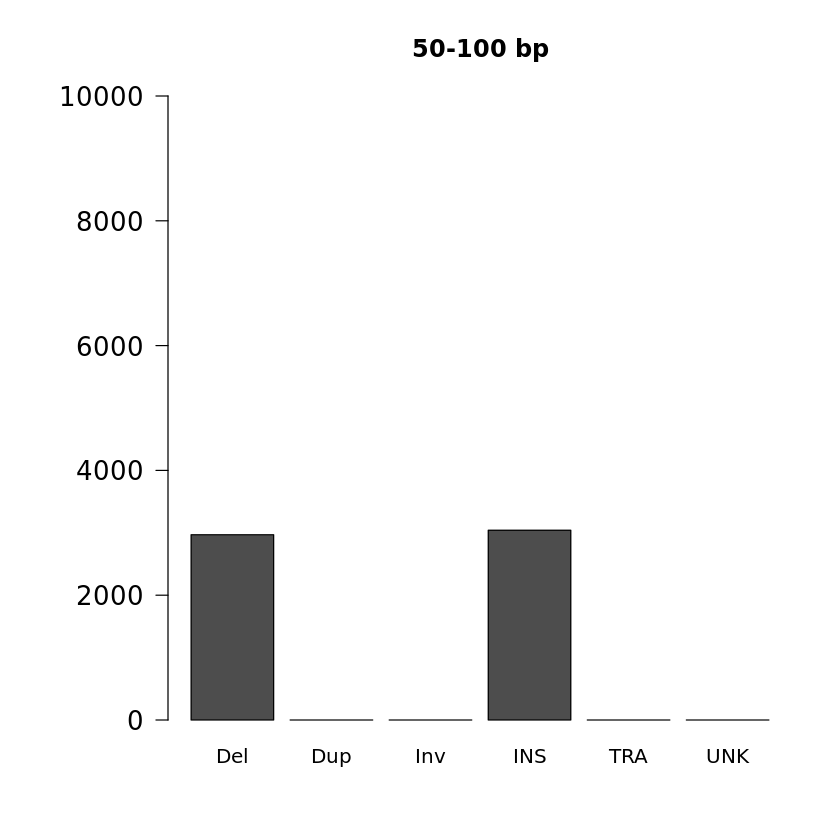

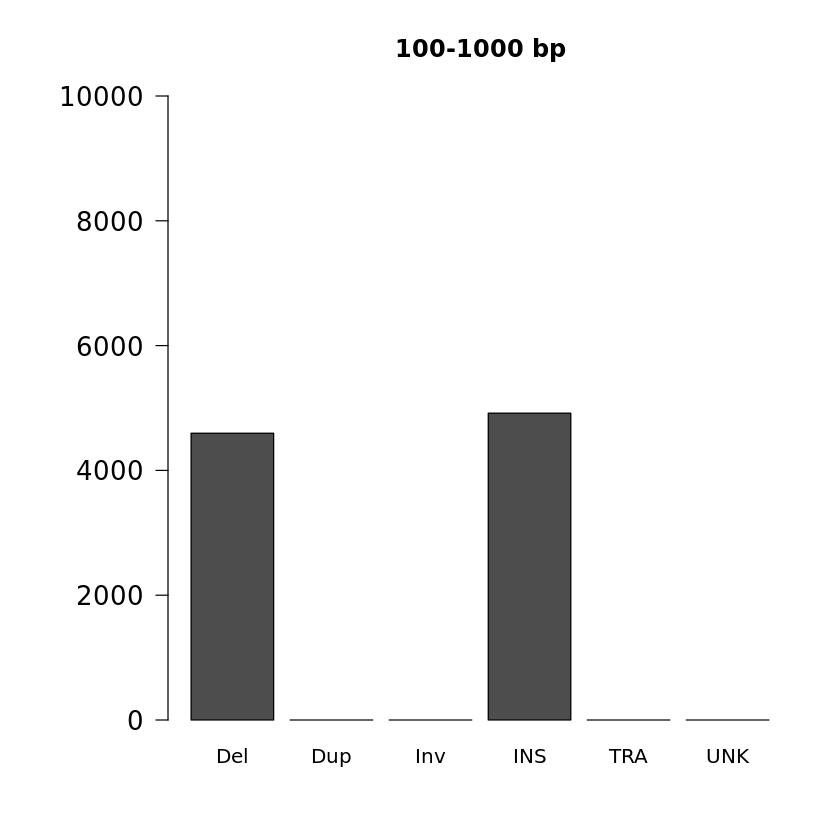

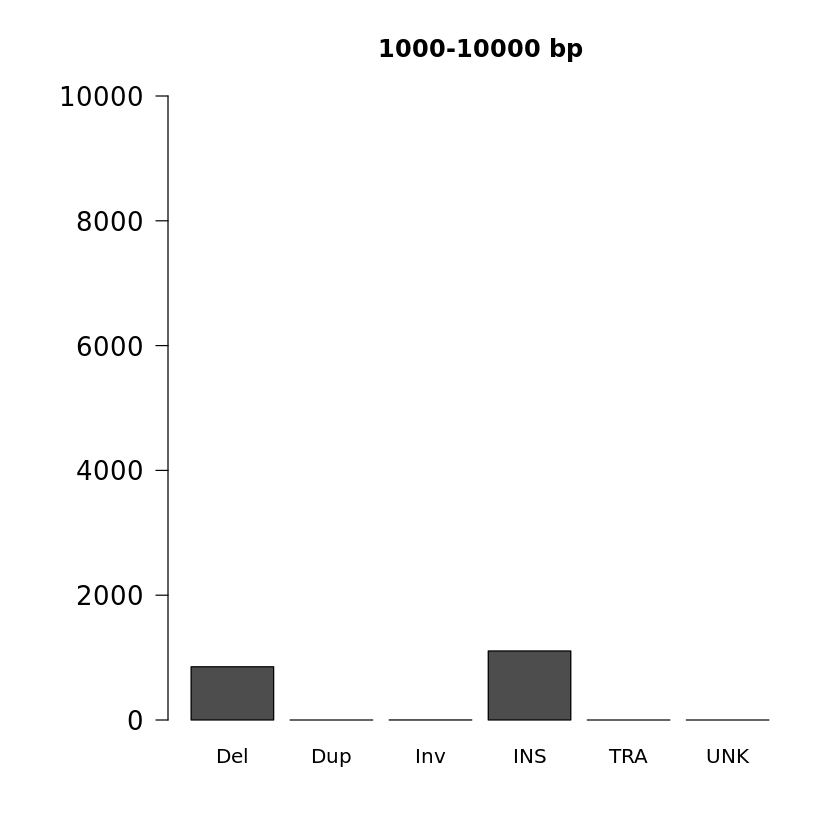

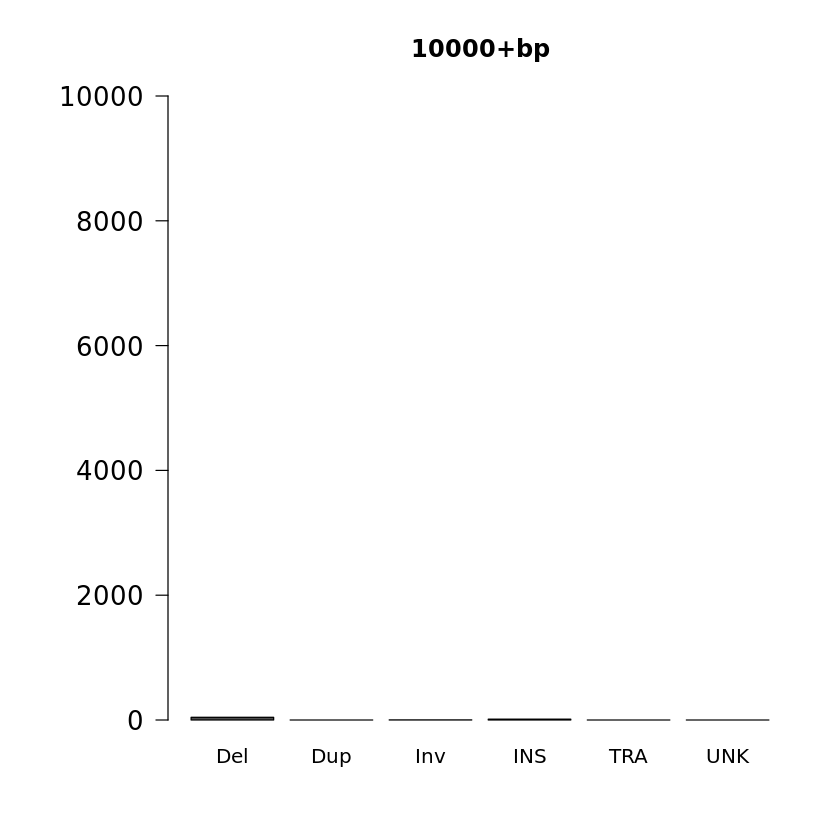

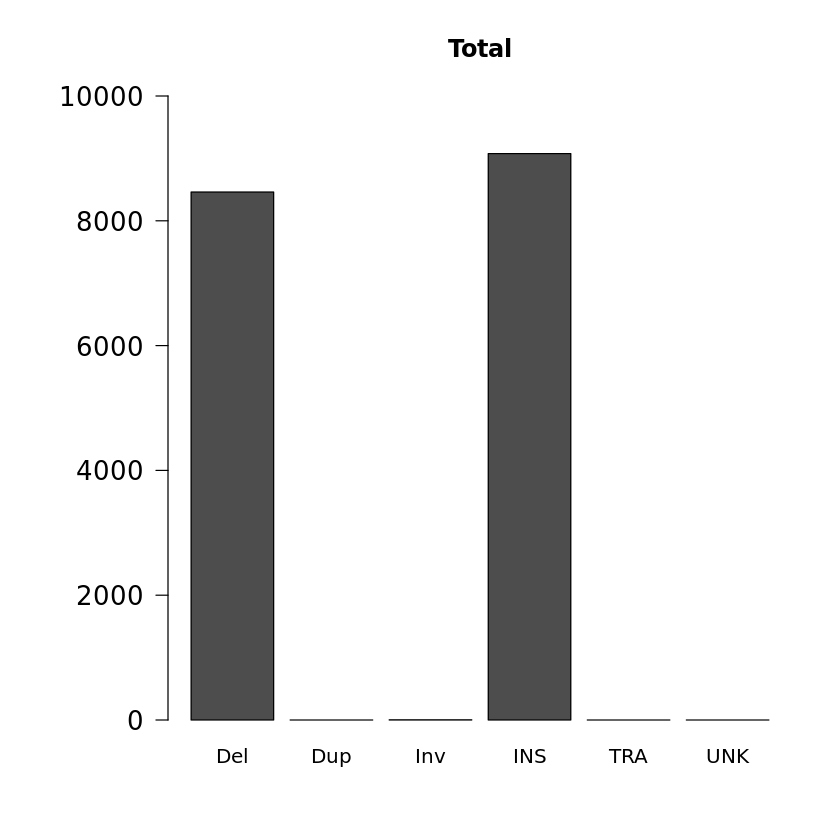

In [62]:
par(mar=c(5, 7, 4, 2))
pav_df %>% filter(Len == '50-100bp') %>% select(Del, Dup, Inv, INS, TRA, UNK) %>% as.matrix() %>% barplot(las=1, cex.axis=1.3, main='50-100 bp', ylim=c(0, 10000))
pav_df %>% filter(Len == '100-1000bp') %>% select(Del, Dup, Inv, INS, TRA, UNK) %>% as.matrix() %>% barplot(las=1, cex.axis=1.3, main='100-1000 bp', ylim=c(0, 10000))
pav_df %>% filter(Len == '1000-10000bp') %>% select(Del, Dup, Inv, INS, TRA, UNK) %>% as.matrix() %>% barplot(las=1, cex.axis=1.3, main='1000-10000 bp', ylim=c(0, 10000))
pav_df %>% filter(Len == '10000+bp') %>% select(Del, Dup, Inv, INS, TRA, UNK) %>% as.matrix() %>% barplot(las=1, cex.axis=1.3, main='10000+bp', ylim=c(0, 10000))
pav_df %>% filter(Len == 'Total') %>% select(Del, Dup, Inv, INS, TRA, UNK) %>% as.matrix() %>% barplot(las=1, cex.axis=1.3, main='Total', ylim=c(0, 10000))


In [63]:
pav_df

Len,Del,Dup,Inv,INS,TRA,UNK,sample
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
50-100bp,2969,0,0,3041,0,0,pav_8838544.stats.txt
100-1000bp,4596,0,0,4917,0,0,pav_8838544.stats.txt
1000-10000bp,853,0,1,1106,0,0,pav_8838544.stats.txt
10000+bp,43,0,2,13,0,0,pav_8838544.stats.txt
Total,8461,0,3,9077,0,0,pav_8838544.stats.txt


In [97]:
pav_df$Len

[1] "50-100bp"     "100-1000bp"   "1000-10000bp" "10000+bp"     "Total"

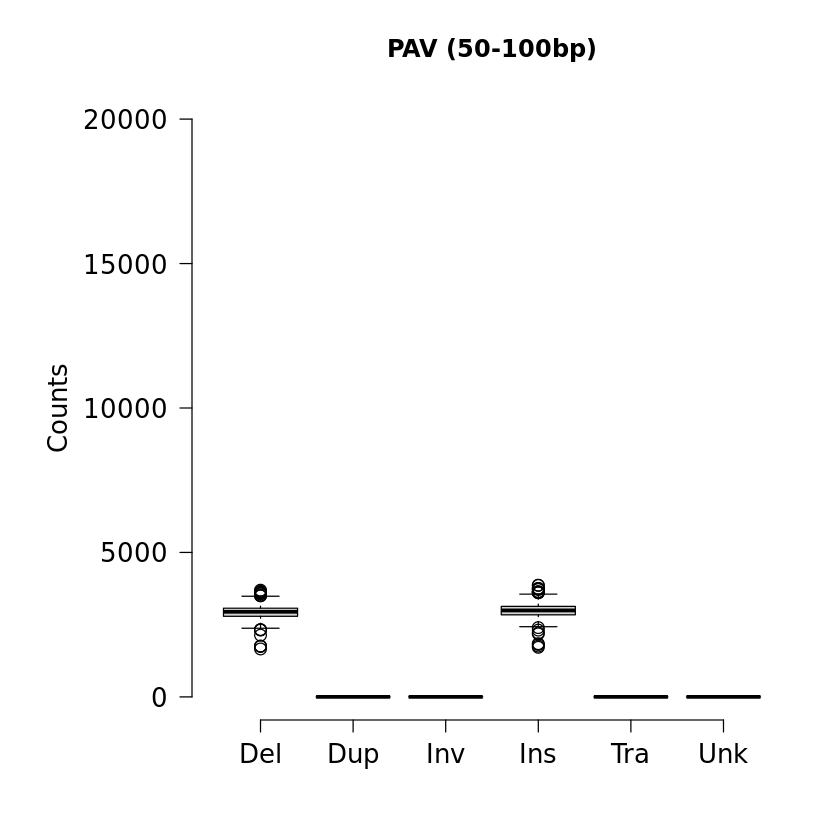

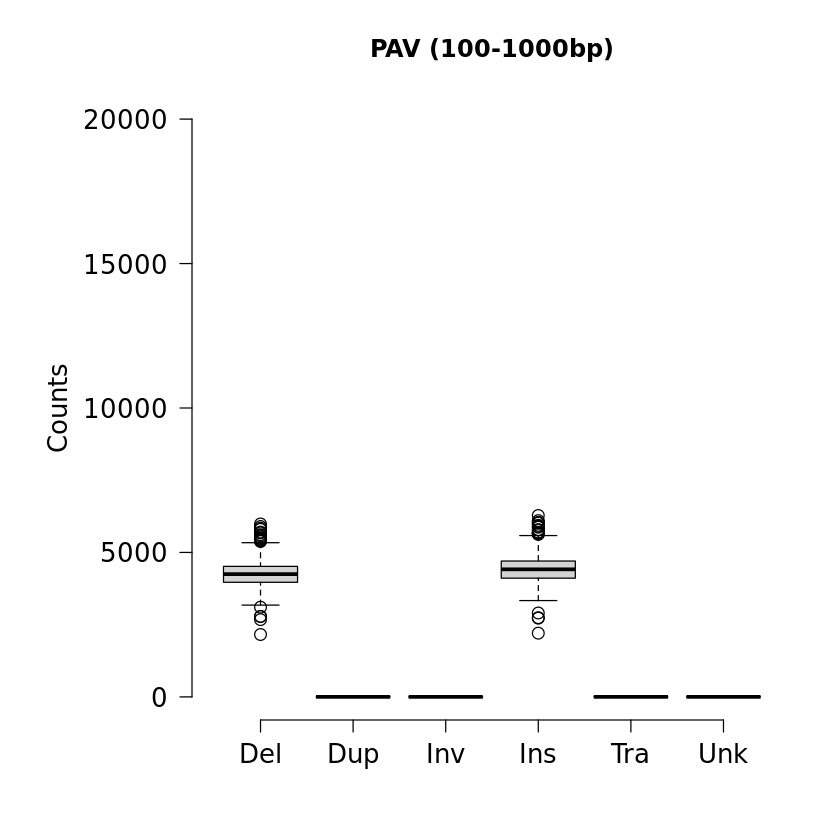

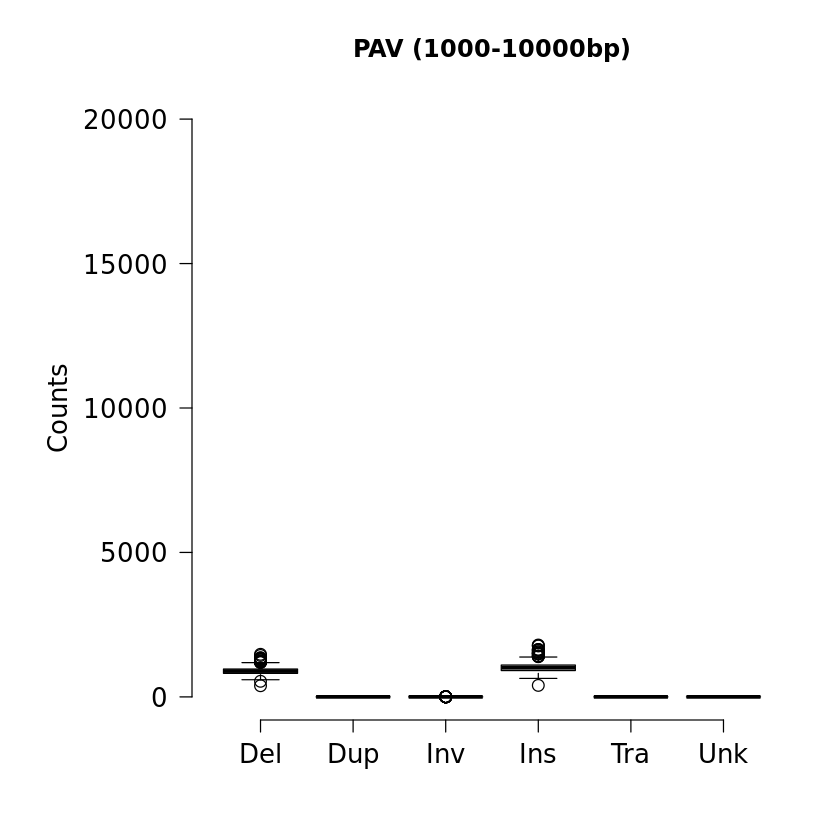

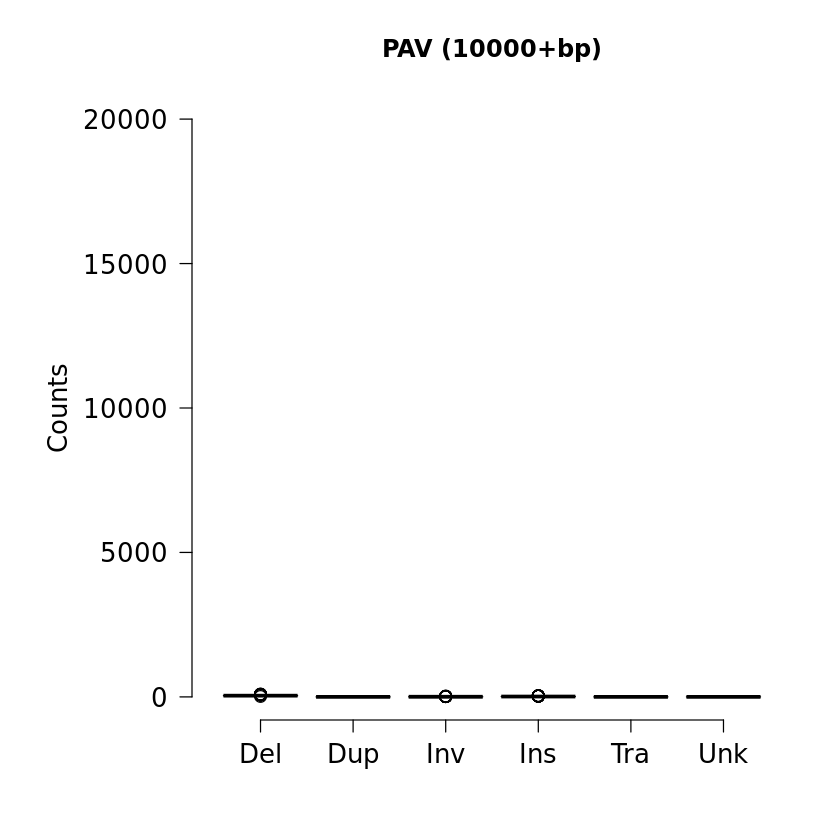

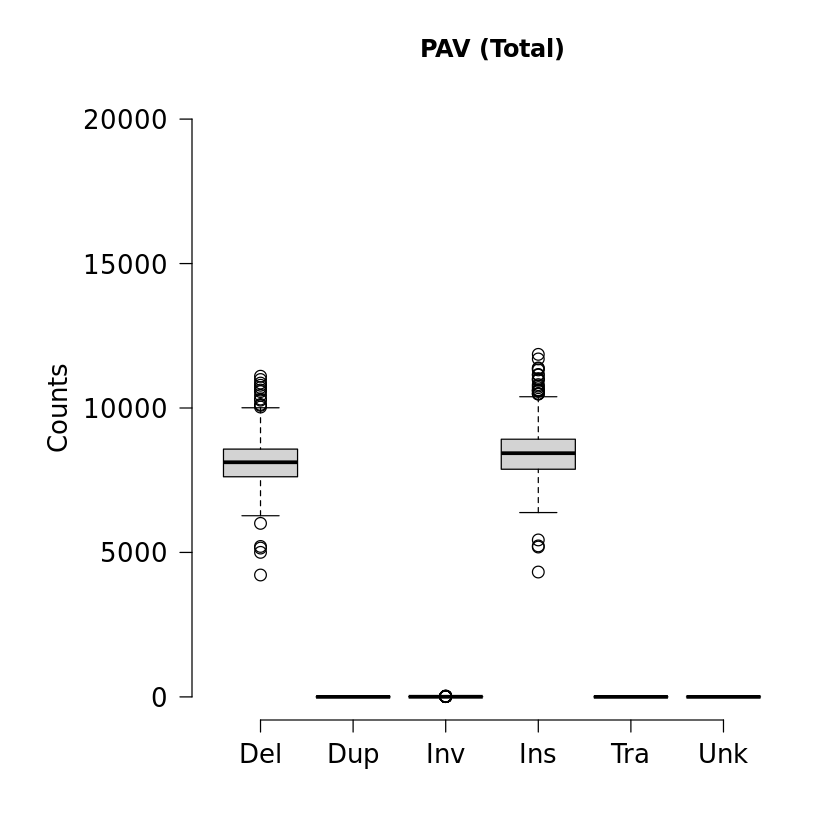

In [108]:
for (len in pav_df$Len) {
    l = list(
        'Del' = pav_all_sv_df %>% filter(Len == len) %>% pull(Del),
        'Dup' = pav_all_sv_df %>% filter(Len == len) %>% pull(Dup),
        'Inv' = pav_all_sv_df %>% filter(Len == len) %>% pull(Inv),
        'Ins' = pav_all_sv_df %>% filter(Len == len) %>% pull(INS),
        'Tra' = pav_all_sv_df %>% filter(Len == len) %>% pull(TRA),
        'Unk' = pav_all_sv_df %>% filter(Len == len) %>% pull(UNK)
    )

    par(mar=c(5, 8, 4, 2))
    boxplot(l, las=1, cex=1.3, cex.axis=1.3, frame=FALSE, main=paste("PAV (", len, ")", sep=""), ylim=c(0, 20000))
    mtext("Counts", 2, line=5, cex=1.3)
}

In [82]:
ha_sample_t2t_df

dvp_tbi,hifiasm_hap2,sniffles_tbi,clair_gvcf,clair_tbi,pbsv_structural_variant_stats,pbsv_vcf,pav_small_variant_stats,clair_small_variant_stats,aligned_read_length_median,⋯,ha-sm-specific-atomic-t2ts,aligned_bam,sniffles_vcf,dvp_g_vcf,pav_vcf,dvp_g_tbi,pav_structural_variant_stats,average_identity,entityType,name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<list>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.deepvariant_pepper.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/PBAssembleWithHifiasm/1000513/assembly/1000513.haploTigs/1000513.bp.hap2.p_ctg.fa.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/sv/1000513.sniffles.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.clair.g.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.clair.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1000513/1000513.pbsv.stats.txt,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/sv/1000513.pbsv.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeSmallVariants/1000513/pav_1000513.stats.txt,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeSmallVariants/1000513/1000513.clair.stats.txt,16463,⋯,"EntityReference , ha-sm-specific-atomic-t2t, DA157919__bc1022_BAK8B_OA",gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/alignments/1000513.bam,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/sv/1000513.sniffles.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.deepvariant_pepper.g.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/91fdd442-eec3-4fc2-9dc7-5c3126b5f86c/pav/f5883716-f9d2-4c57-bf85-332e30262852/call-write_vcf/pav_1000513.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.deepvariant_pepper.g.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1000513/pav_1000513.stats.txt,98.9,ha-sample-t2t,1000513
gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/small/1000920.deepvariant_pepper.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/PBAssembleWithHifiasm/1000920/assembly/1000920.haploTigs/1000920.bp.hap2.p_ctg.fa.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/sv/1000920.sniffles.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/small/1000920.clair.g.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/small/1000920.clair.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1000920/1000920.pbsv.stats.txt,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/sv/1000920.pbsv.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeSmallVariants/1000920/pav_1000920.stats.txt,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeSmallVariants/1000920/1000920.clair.stats.txt,18287,⋯,"EntityReference , ha-sm-specific-atomic-t2t, DA133698__bc1008_BAK8A_OA",gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/alignments/1000920.bam,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/sv/1000920.sniffles.vcf.gz,gs://fc

In [83]:
for (file in (ha_sample_t2t_df %>% filter(!is.na(pbsv_structural_variant_stats)) %>% pull(pbsv_structural_variant_stats))) {
    print(file)
}

[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1000513/1000513.pbsv.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1000920/1000920.pbsv.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1002322/1002322.pbsv.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1002826/1002826.pbsv.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1004266/1004266.pbsv.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1005038/1005038.pbsv.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1005444/1005444.pbsv.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/

In [84]:
system("gsutil -m cp gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/*/*.pbsv.stats.txt .", intern=TRUE)


character(0)

In [87]:
pbsv_all_sv_df = NULL
for (file in (ha_sample_t2t_df %>% filter(!is.na(ha_sample_t2t_df$pbsv_structural_variant_stats)) %>% pull(pbsv_structural_variant_stats))) {
    pbsv_file = basename(file)
    if (file.exists(pbsv_file)) {
        pbsv_df = read_table(pbsv_file, show_col_types=FALSE)
        pbsv_df = pbsv_df %>% tail(n=4) %>% adorn_totals("row") %>% mutate(sample = pbsv_file)
        
        if (is.null(pbsv_all_sv_df)) {
            pbsv_all_sv_df = pbsv_df
        } else {
            pbsv_all_sv_df = rbind(pbsv_all_sv_df, pbsv_df)
        }
    }
}

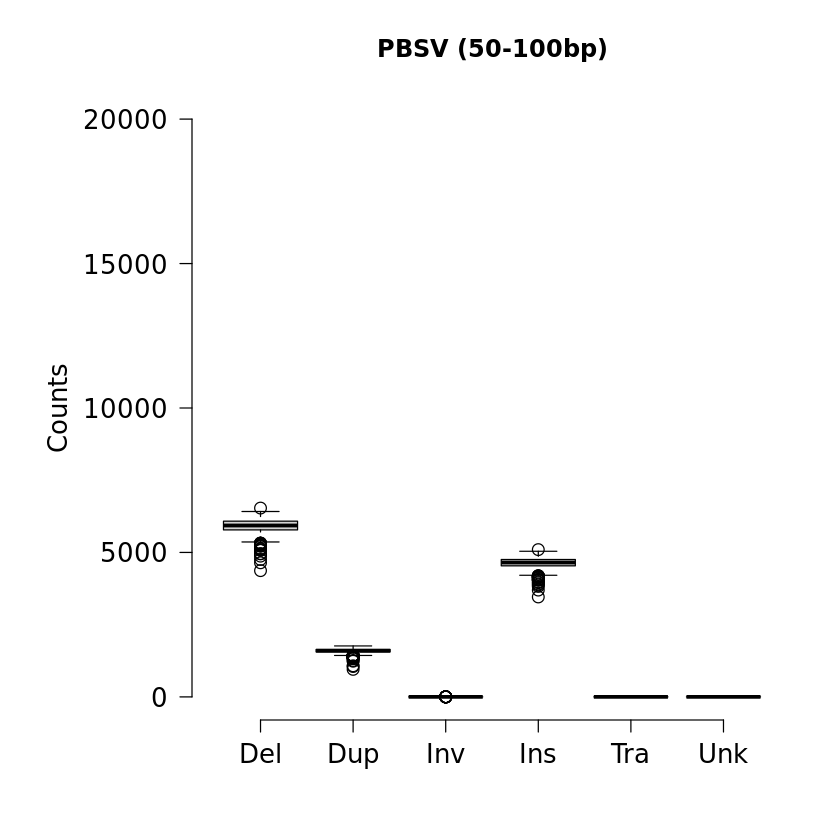

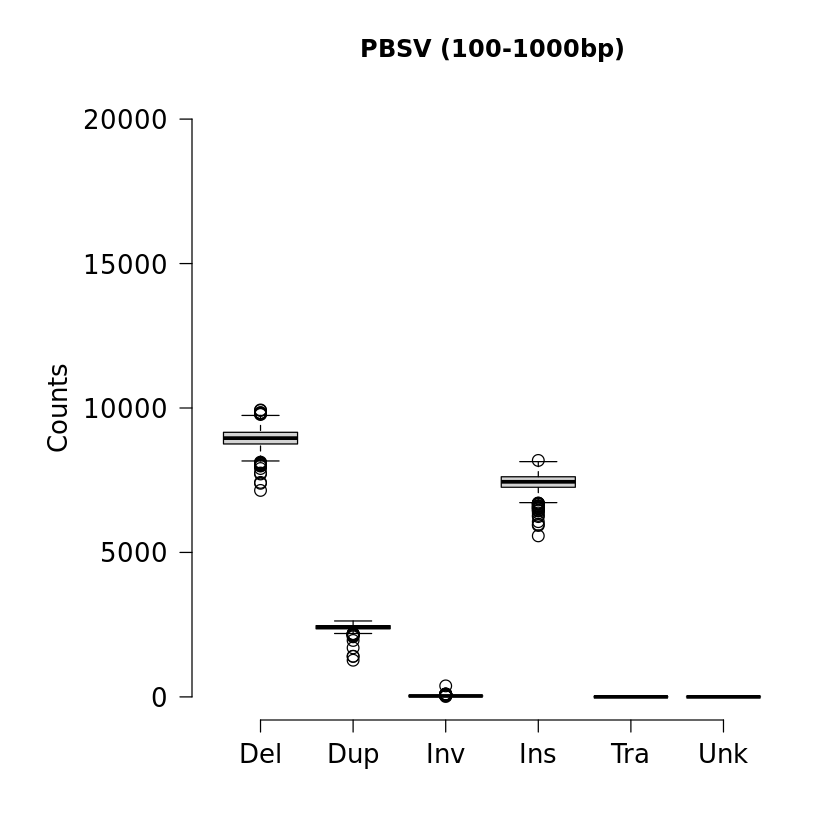

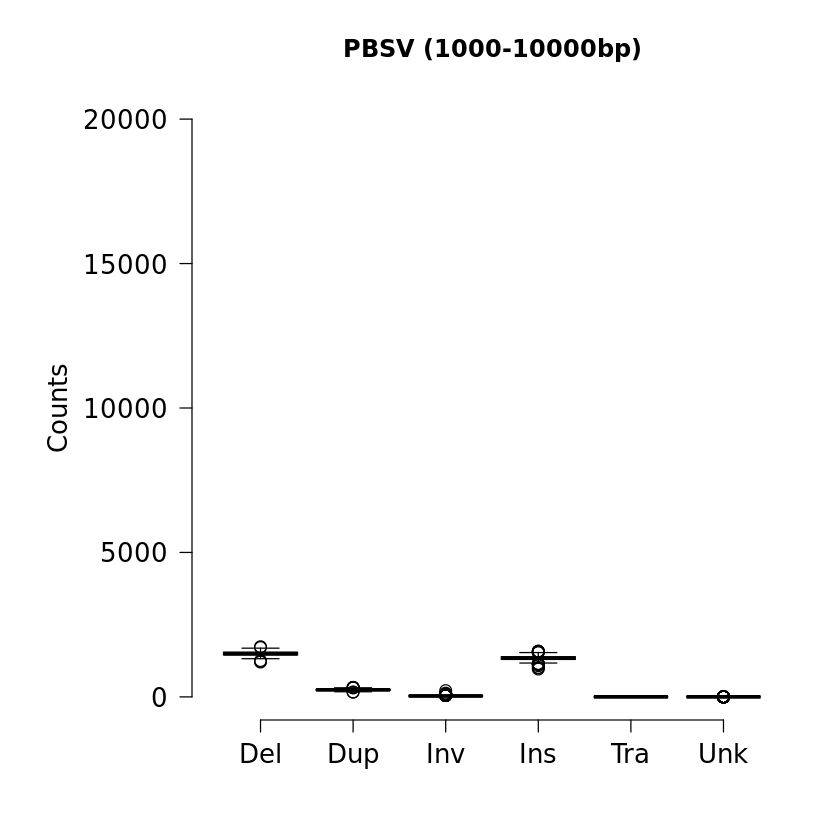

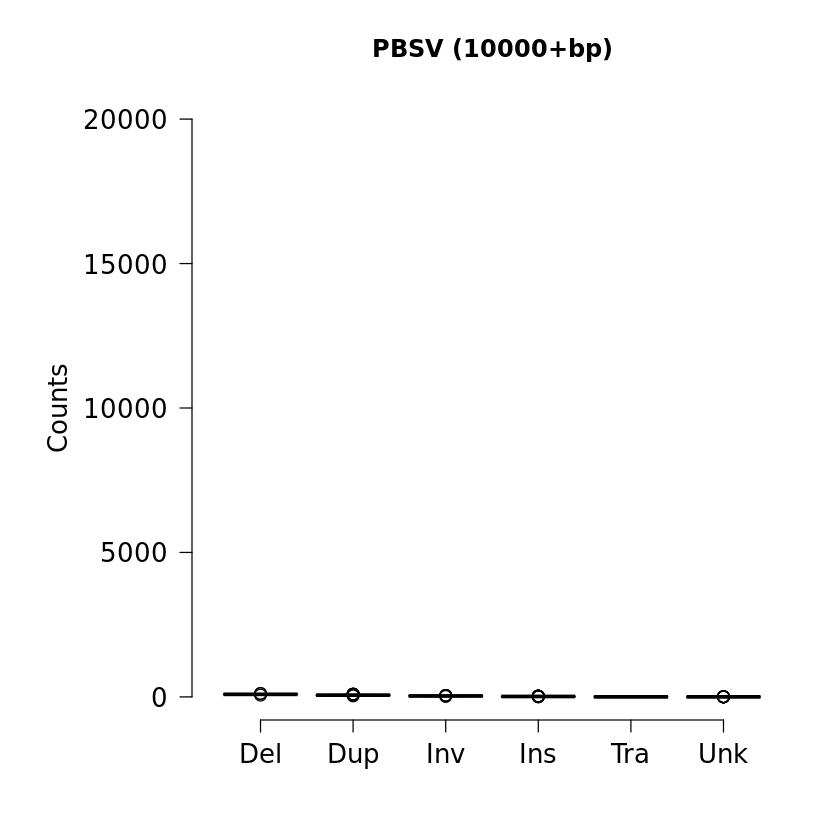

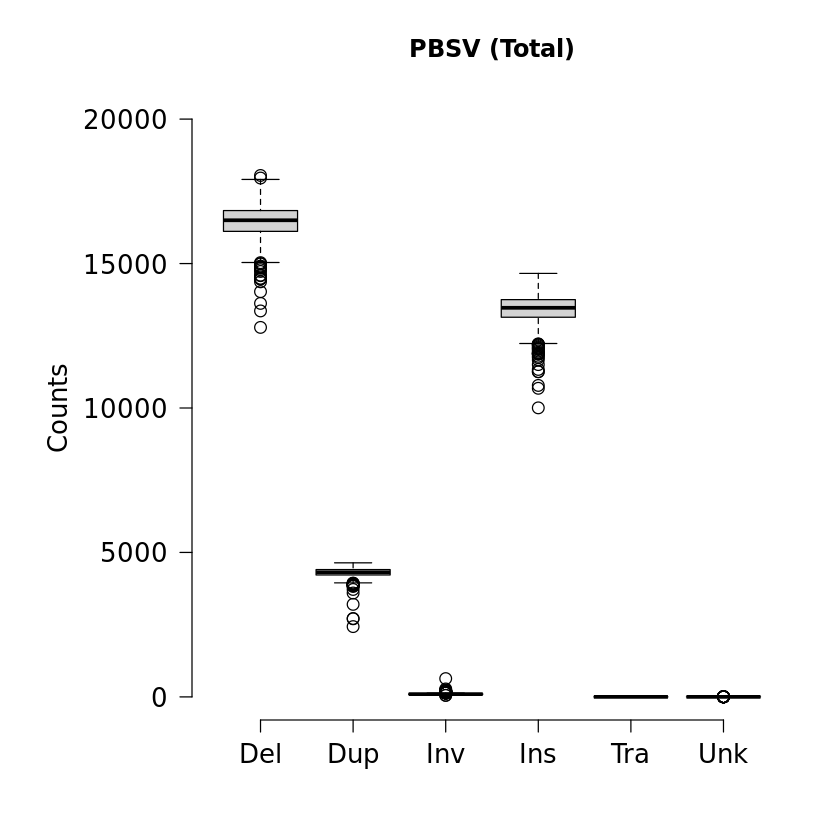

In [107]:
for (len in pbsv_df$Len) {
    l = list(
        'Del' = pbsv_all_sv_df %>% filter(Len == len) %>% pull(Del),
        'Dup' = pbsv_all_sv_df %>% filter(Len == len) %>% pull(Dup),
        'Inv' = pbsv_all_sv_df %>% filter(Len == len) %>% pull(Inv),
        'Ins' = pbsv_all_sv_df %>% filter(Len == len) %>% pull(INS),
        'Tra' = pbsv_all_sv_df %>% filter(Len == len) %>% pull(TRA),
        'Unk' = pbsv_all_sv_df %>% filter(Len == len) %>% pull(UNK)
    )

    par(mar=c(5, 8, 4, 2))
    boxplot(l, las=1, cex=1.3, cex.axis=1.3, frame=FALSE, main=paste("PBSV (", len, ")", sep=""), ylim=c(0, 20000))
    mtext("Counts", 2, line=5, cex=1.3)
}

In [89]:
for (file in (ha_sample_t2t_df %>% filter(!is.na(sniffles_structural_variant_stats)) %>% pull(sniffles_structural_variant_stats))) {
    print(file)
}

[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1000513/1000513.sniffles.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1000920/1000920.sniffles.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1002322/1002322.sniffles.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1002826/1002826.sniffles.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1004266/1004266.sniffles.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1005038/1005038.sniffles.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1005444/1005444.sniffles.stats.txt"
[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/

In [90]:
system("gsutil -m cp gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/*/*.sniffles.stats.txt .", intern=TRUE)

character(0)

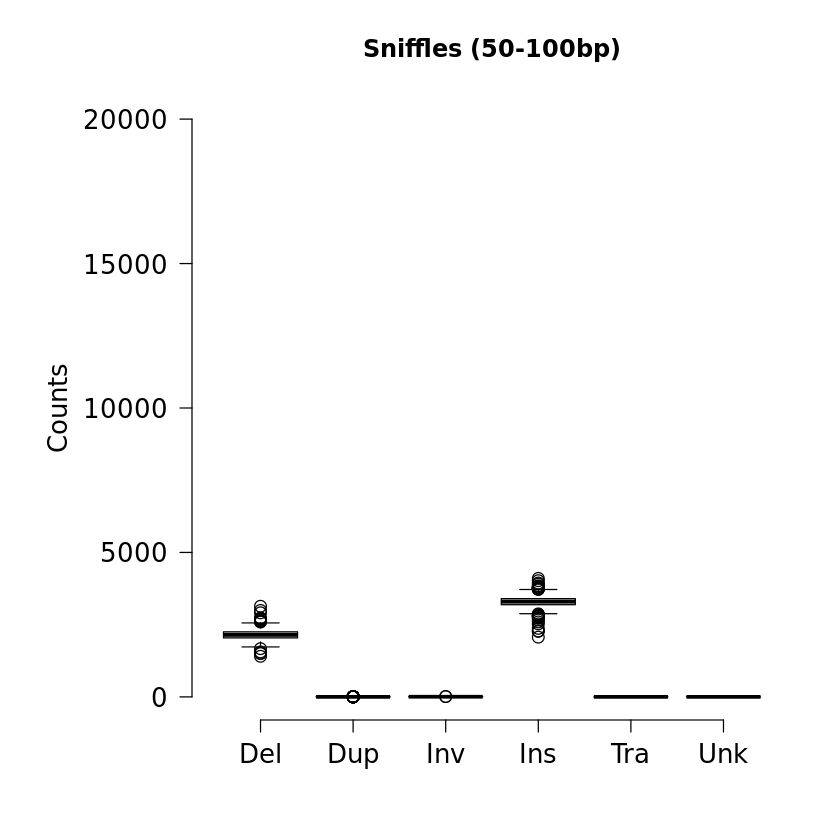

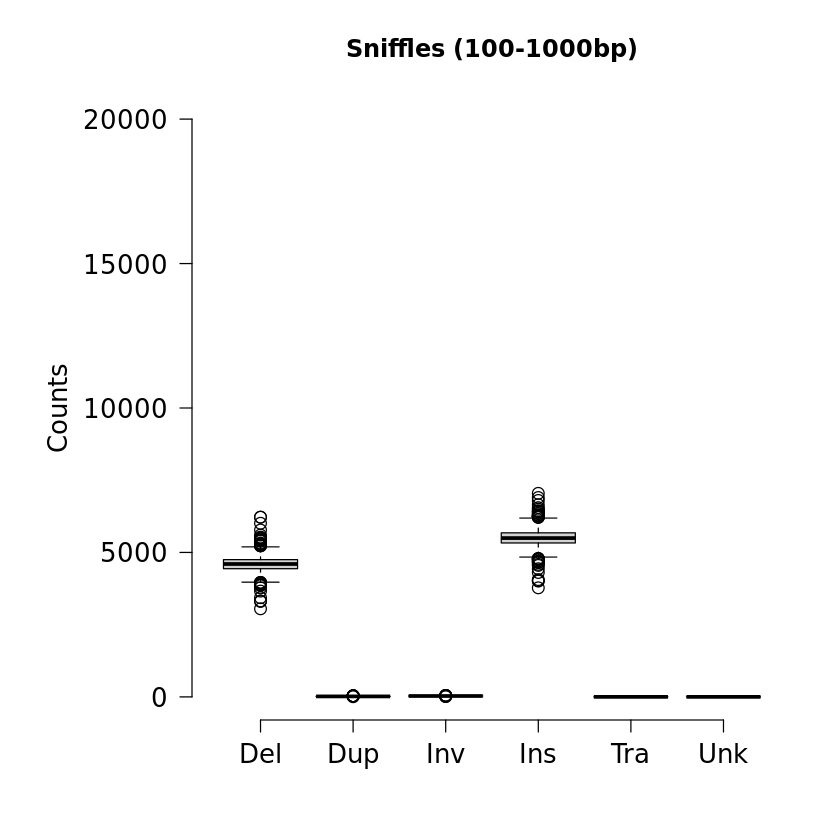

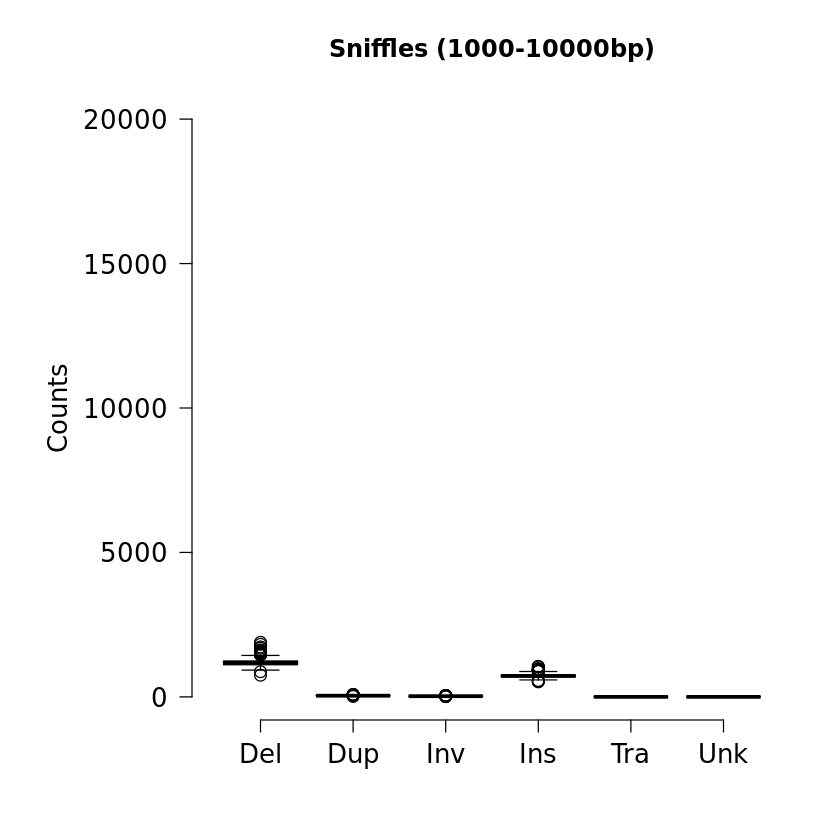

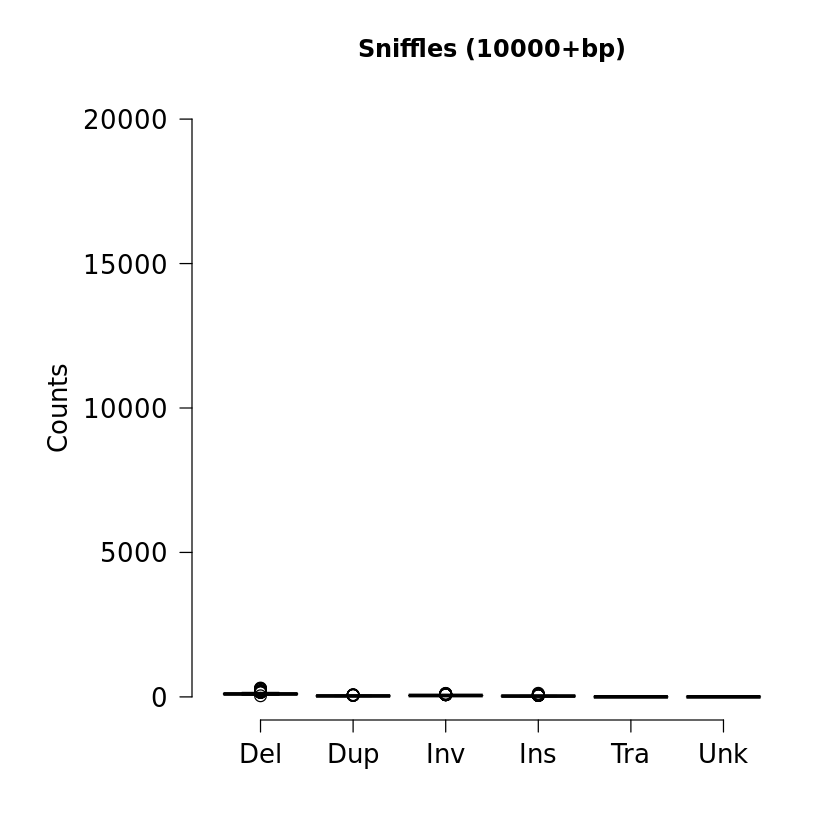

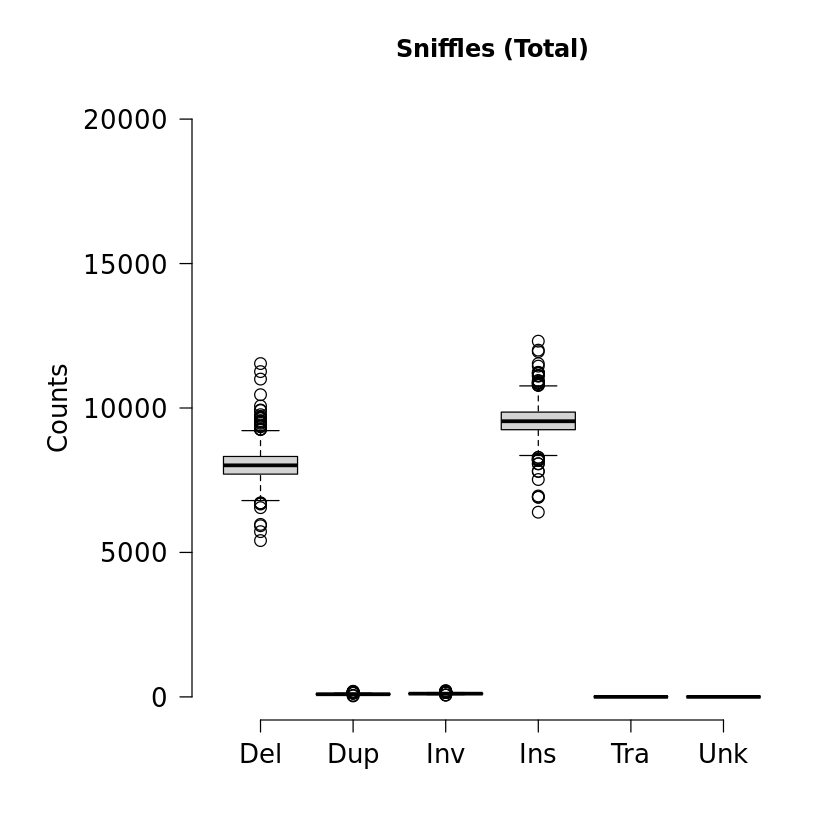

In [109]:
for (len in sniffles_df$Len) {
    l = list(
        'Del' = sniffles_all_sv_df %>% filter(Len == len) %>% pull(Del),
        'Dup' = sniffles_all_sv_df %>% filter(Len == len) %>% pull(Dup),
        'Inv' = sniffles_all_sv_df %>% filter(Len == len) %>% pull(Inv),
        'Ins' = sniffles_all_sv_df %>% filter(Len == len) %>% pull(INS),
        'Tra' = sniffles_all_sv_df %>% filter(Len == len) %>% pull(TRA),
        'Unk' = sniffles_all_sv_df %>% filter(Len == len) %>% pull(UNK)
    )

    par(mar=c(5, 8, 4, 2))
    boxplot(l, las=1, cex=1.3, cex.axis=1.3, frame=FALSE, main=paste("Sniffles (", len, ")", sep=""), ylim=c(0, 20000))
    mtext("Counts", 2, line=5, cex=1.3)
}

In [145]:
rbind(pav_df, pbsv_df, sniffles_df) %>% filter(Len == '50-100bp') %>% select(sample, Del, Dup, Inv, INS, TRA, UNK) %>% as.matrix()


sample,Del,Dup,Inv,INS,TRA,UNK
pav_8838544.stats.txt,2969,0,0,3041,0,0
8838544.pbsv.stats.txt,6205,1605,0,4710,0,0
8838544.sniffles.stats.txt,2337,1,5,3330,0,0


In [157]:
for (len in pbsv_df$Len) {
    print(len)
    rbind(pav_df, pbsv_df, sniffles_df) %>% filter(Len == len) %>% select(sample, Del, Dup, Inv, INS, TRA, UNK) %>% print()
}


[1] "50-100bp"
                     sample  Del  Dup Inv  INS TRA UNK
      pav_8838544.stats.txt 2969    0   0 3041   0   0
     8838544.pbsv.stats.txt 6205 1605   0 4710   0   0
 8838544.sniffles.stats.txt 2337    1   5 3330   0   0
[1] "100-1000bp"
                     sample  Del  Dup Inv  INS TRA UNK
      pav_8838544.stats.txt 4596    0   0 4917   0   0
     8838544.pbsv.stats.txt 9346 2523  34 7763   0   0
 8838544.sniffles.stats.txt 4667   15  30 5750   0   0
[1] "1000-10000bp"
                     sample  Del Dup Inv  INS TRA UNK
      pav_8838544.stats.txt  853   0   1 1106   0   0
     8838544.pbsv.stats.txt 1456 239  28 1381   0   0
 8838544.sniffles.stats.txt 1155  44  28  697   0   0
[1] "10000+bp"
                     sample Del Dup Inv INS TRA UNK
      pav_8838544.stats.txt  43   0   2  13   0   0
     8838544.pbsv.stats.txt  92  54  33   9   0   0
 8838544.sniffles.stats.txt  97  40  54  26   0   0
[1] "Total"
                     sample   Del  Dup Inv   INS TRA UNK
 

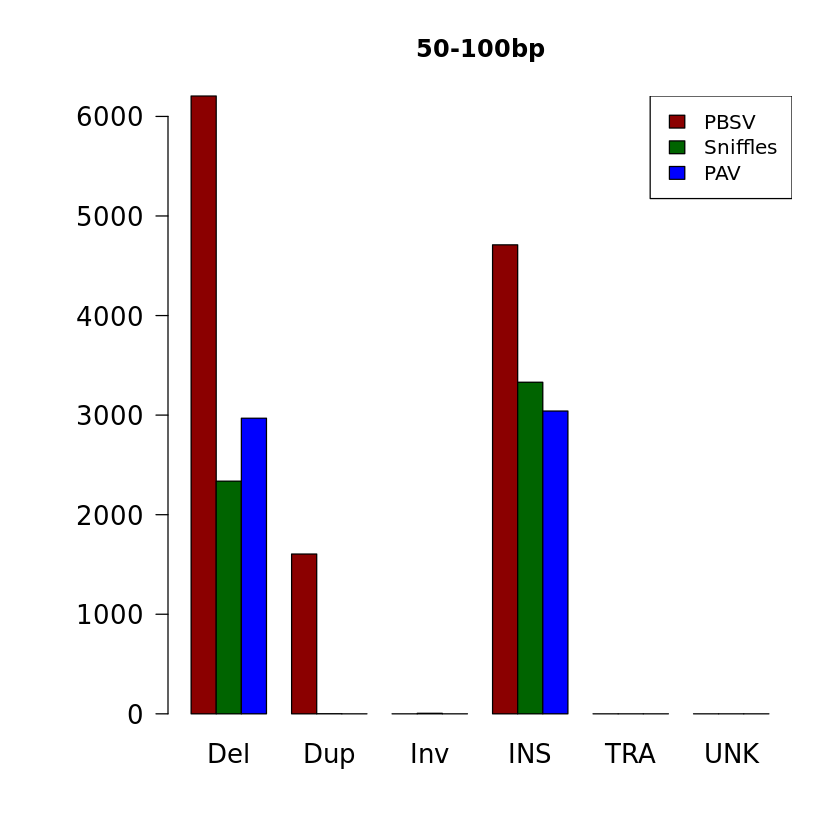

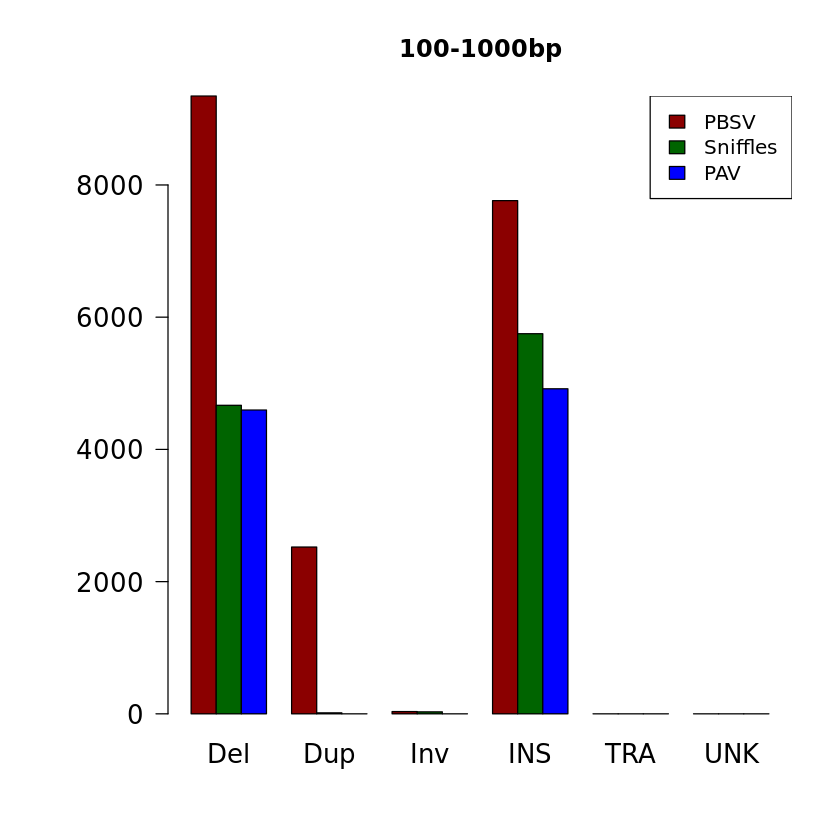

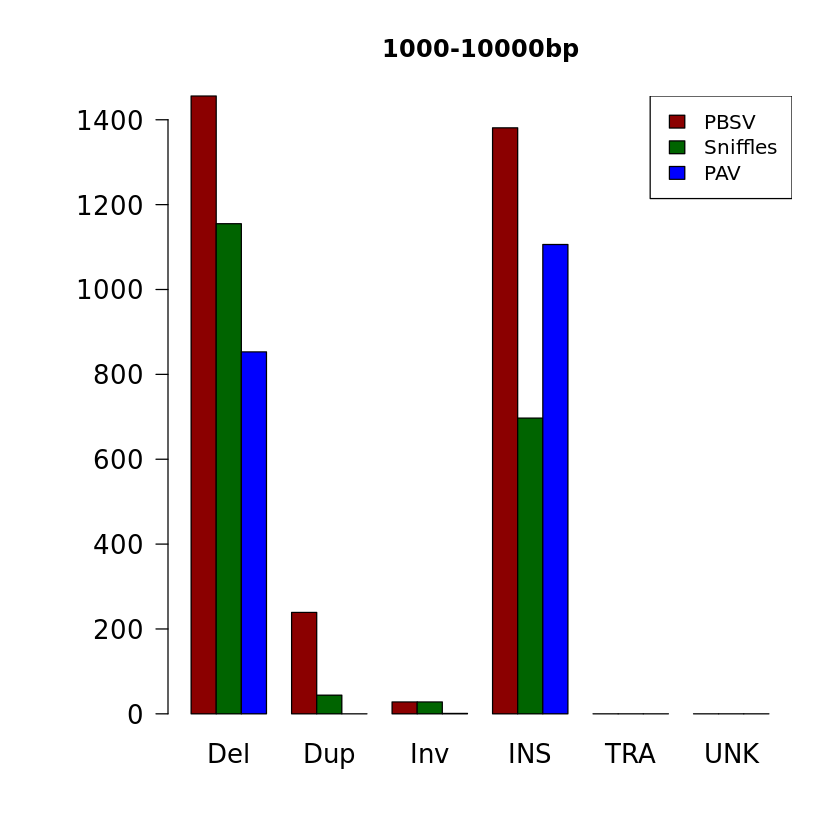

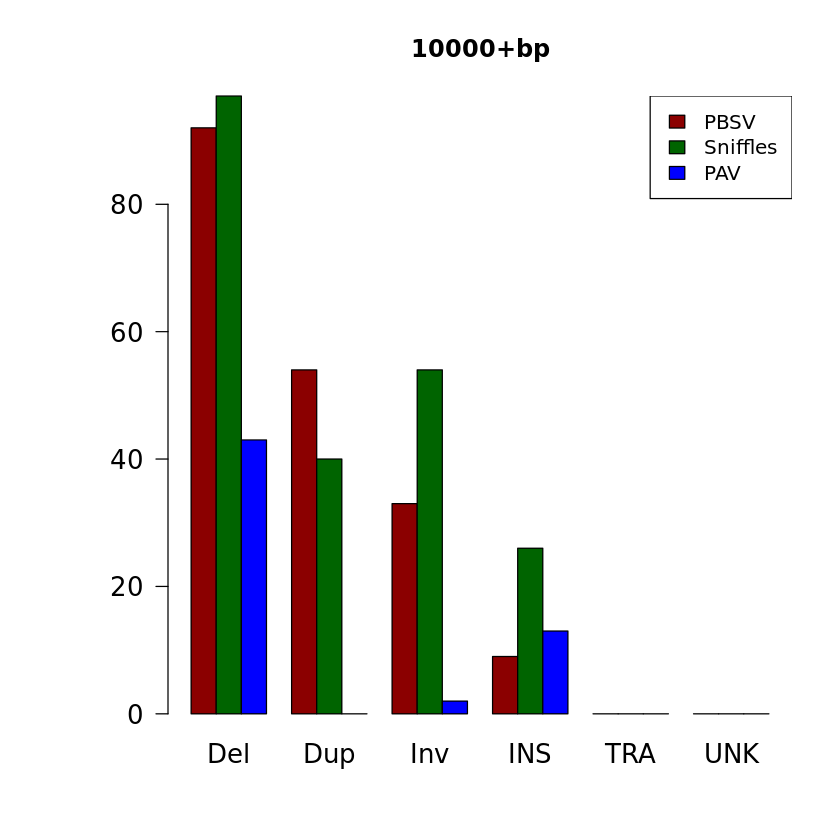

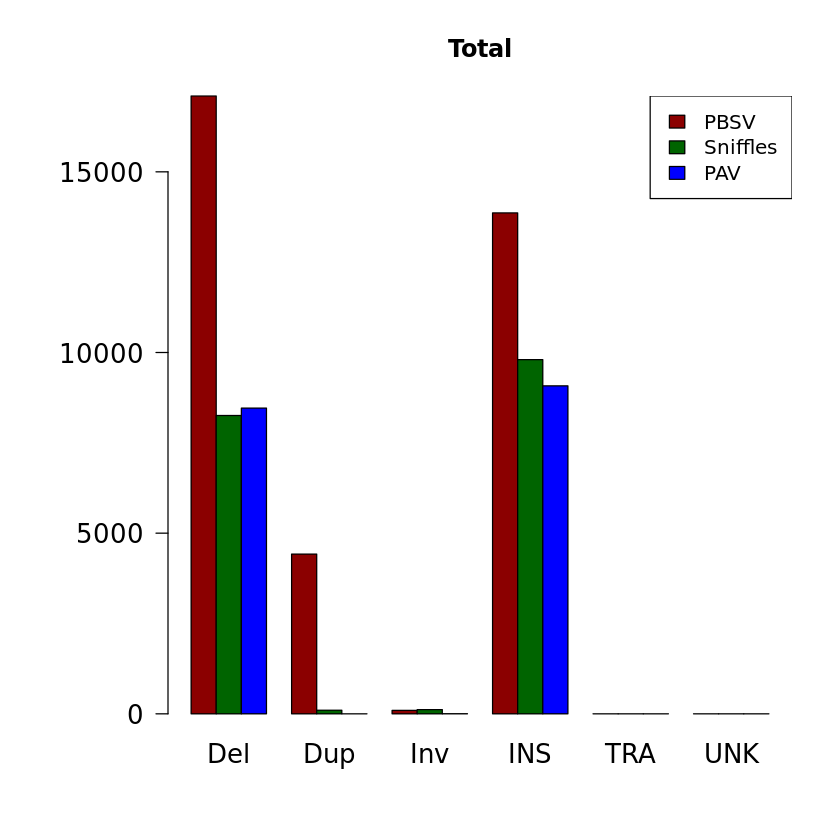

In [192]:
par(mar=c(5, 7, 4, 2))
for (len in pbsv_df$Len) {
    rbind(pbsv_df, sniffles_df, pav_df) %>% filter(Len == len) %>% select(Del, Dup, Inv, INS, TRA, UNK) %>% as.matrix() %>% barplot(cex.names=1.3, cex.axis=1.3, las=1, beside=TRUE, main=len, col=c("darkred", "darkgreen", "blue"))
    legend("topright", c("PBSV", "Sniffles", "PAV"), fill=c("darkred", "darkgreen", "blue"))
}


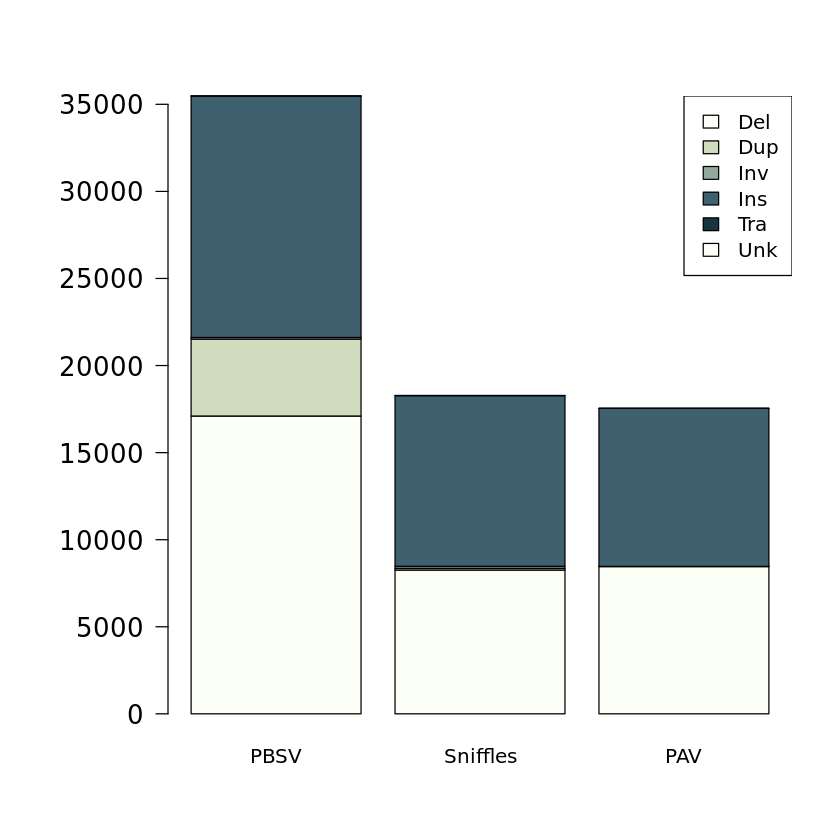

In [189]:
par(mar=c(5, 7, 4, 2))

rbind(
    pbsv_df %>% tail(n=1) %>% select(Del, Dup, Inv, INS, TRA, UNK) %>% as.matrix(),
    sniffles_df %>% tail(n=1) %>% select(Del, Dup, Inv, INS, TRA, UNK) %>% as.matrix(),
    pav_df %>% tail(n=1) %>% select(Del, Dup, Inv, INS, TRA, UNK) %>% as.matrix()
) %>% t() %>% barplot(las=1, cex.axis=1.3, names.arg=c("PBSV", "Sniffles", "PAV"), col=c("#FCFFF5", "#D1DBBD", "#91AA9D", "#3E606F", "#193441"))

legend("topright", c("Del", "Dup", "Inv", "Ins", "Tra", "Unk"), fill=c("#FCFFF5", "#D1DBBD", "#91AA9D", "#3E606F", "#193441"))